# Best Selling Books (2009-2019)
our project contains data and visualizations of the best-selling books from 2009 to 2019. The project aims to provide insights into literary trends, popular genres, and notable authors over the decade. our project contains data and visualizations of the best-selling books from 2009 to 2019. The project aims to provide insights into literary trends, popular genres, and notable authors over the decade. 

## Step 1: Data Exploration and Visualization

In [8]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Load the dataset
df = pd.read_csv('./dataset.csv')


### Display the first few rows of the dataset

In [9]:

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())


First few rows of the dataset:


,Sr.No,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,0,12.49,1.0,The Lost Symbol,"16,118",4.4,Dan Brown,Hardcover,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,"23,392",4.7,William P. Young,Paperback,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,"5,036",4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)","16,912",4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,"1,572",4.6,Sarah Palin,Hardcover,2009,Non Fiction


### Display basic information about the dataset

In [3]:

# Display basic information about the dataset
print("Dataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sr.No          1291 non-null   int64  
 1   price          1287 non-null   float64
 2   ranks          1287 non-null   float64
 3   title          1286 non-null   object 
 4   no_of_reviews  1287 non-null   object 
 5   ratings        1287 non-null   float64
 6   author         1286 non-null   object 
 7   cover_type     1286 non-null   object 
 8   year           1291 non-null   int64  
 9   genre          1288 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 101.0+ KB


### Generate descriptive statistics

In [4]:

# Generate descriptive statistics
print("Descriptive statistics:")
display(df.describe())


Descriptive statistics:


,Sr.No,price,ranks,ratings,year
count,1291.000000,1287.000000,1287.000000,1287.000000,1291.000000
mean,645.000000,13.757117,50.246309,4.650894,2015.027111
std,372.823908,10.046391,28.803308,0.197174,3.734404
min,0.000000,1.170000,1.000000,3.400000,2009.000000
25%,322.500000,8.550000,25.000000,4.600000,2012.000000
50%,645.000000,12.100000,50.000000,4.700000,2015.000000
75%,967.500000,16.290000,75.000000,4.800000,2018.000000
max,1290.000000,144.000000,100.000000,4.900000,2021.000000


### Visualize distributions using histograms

<Figure size 3000x4000 with 0 Axes>

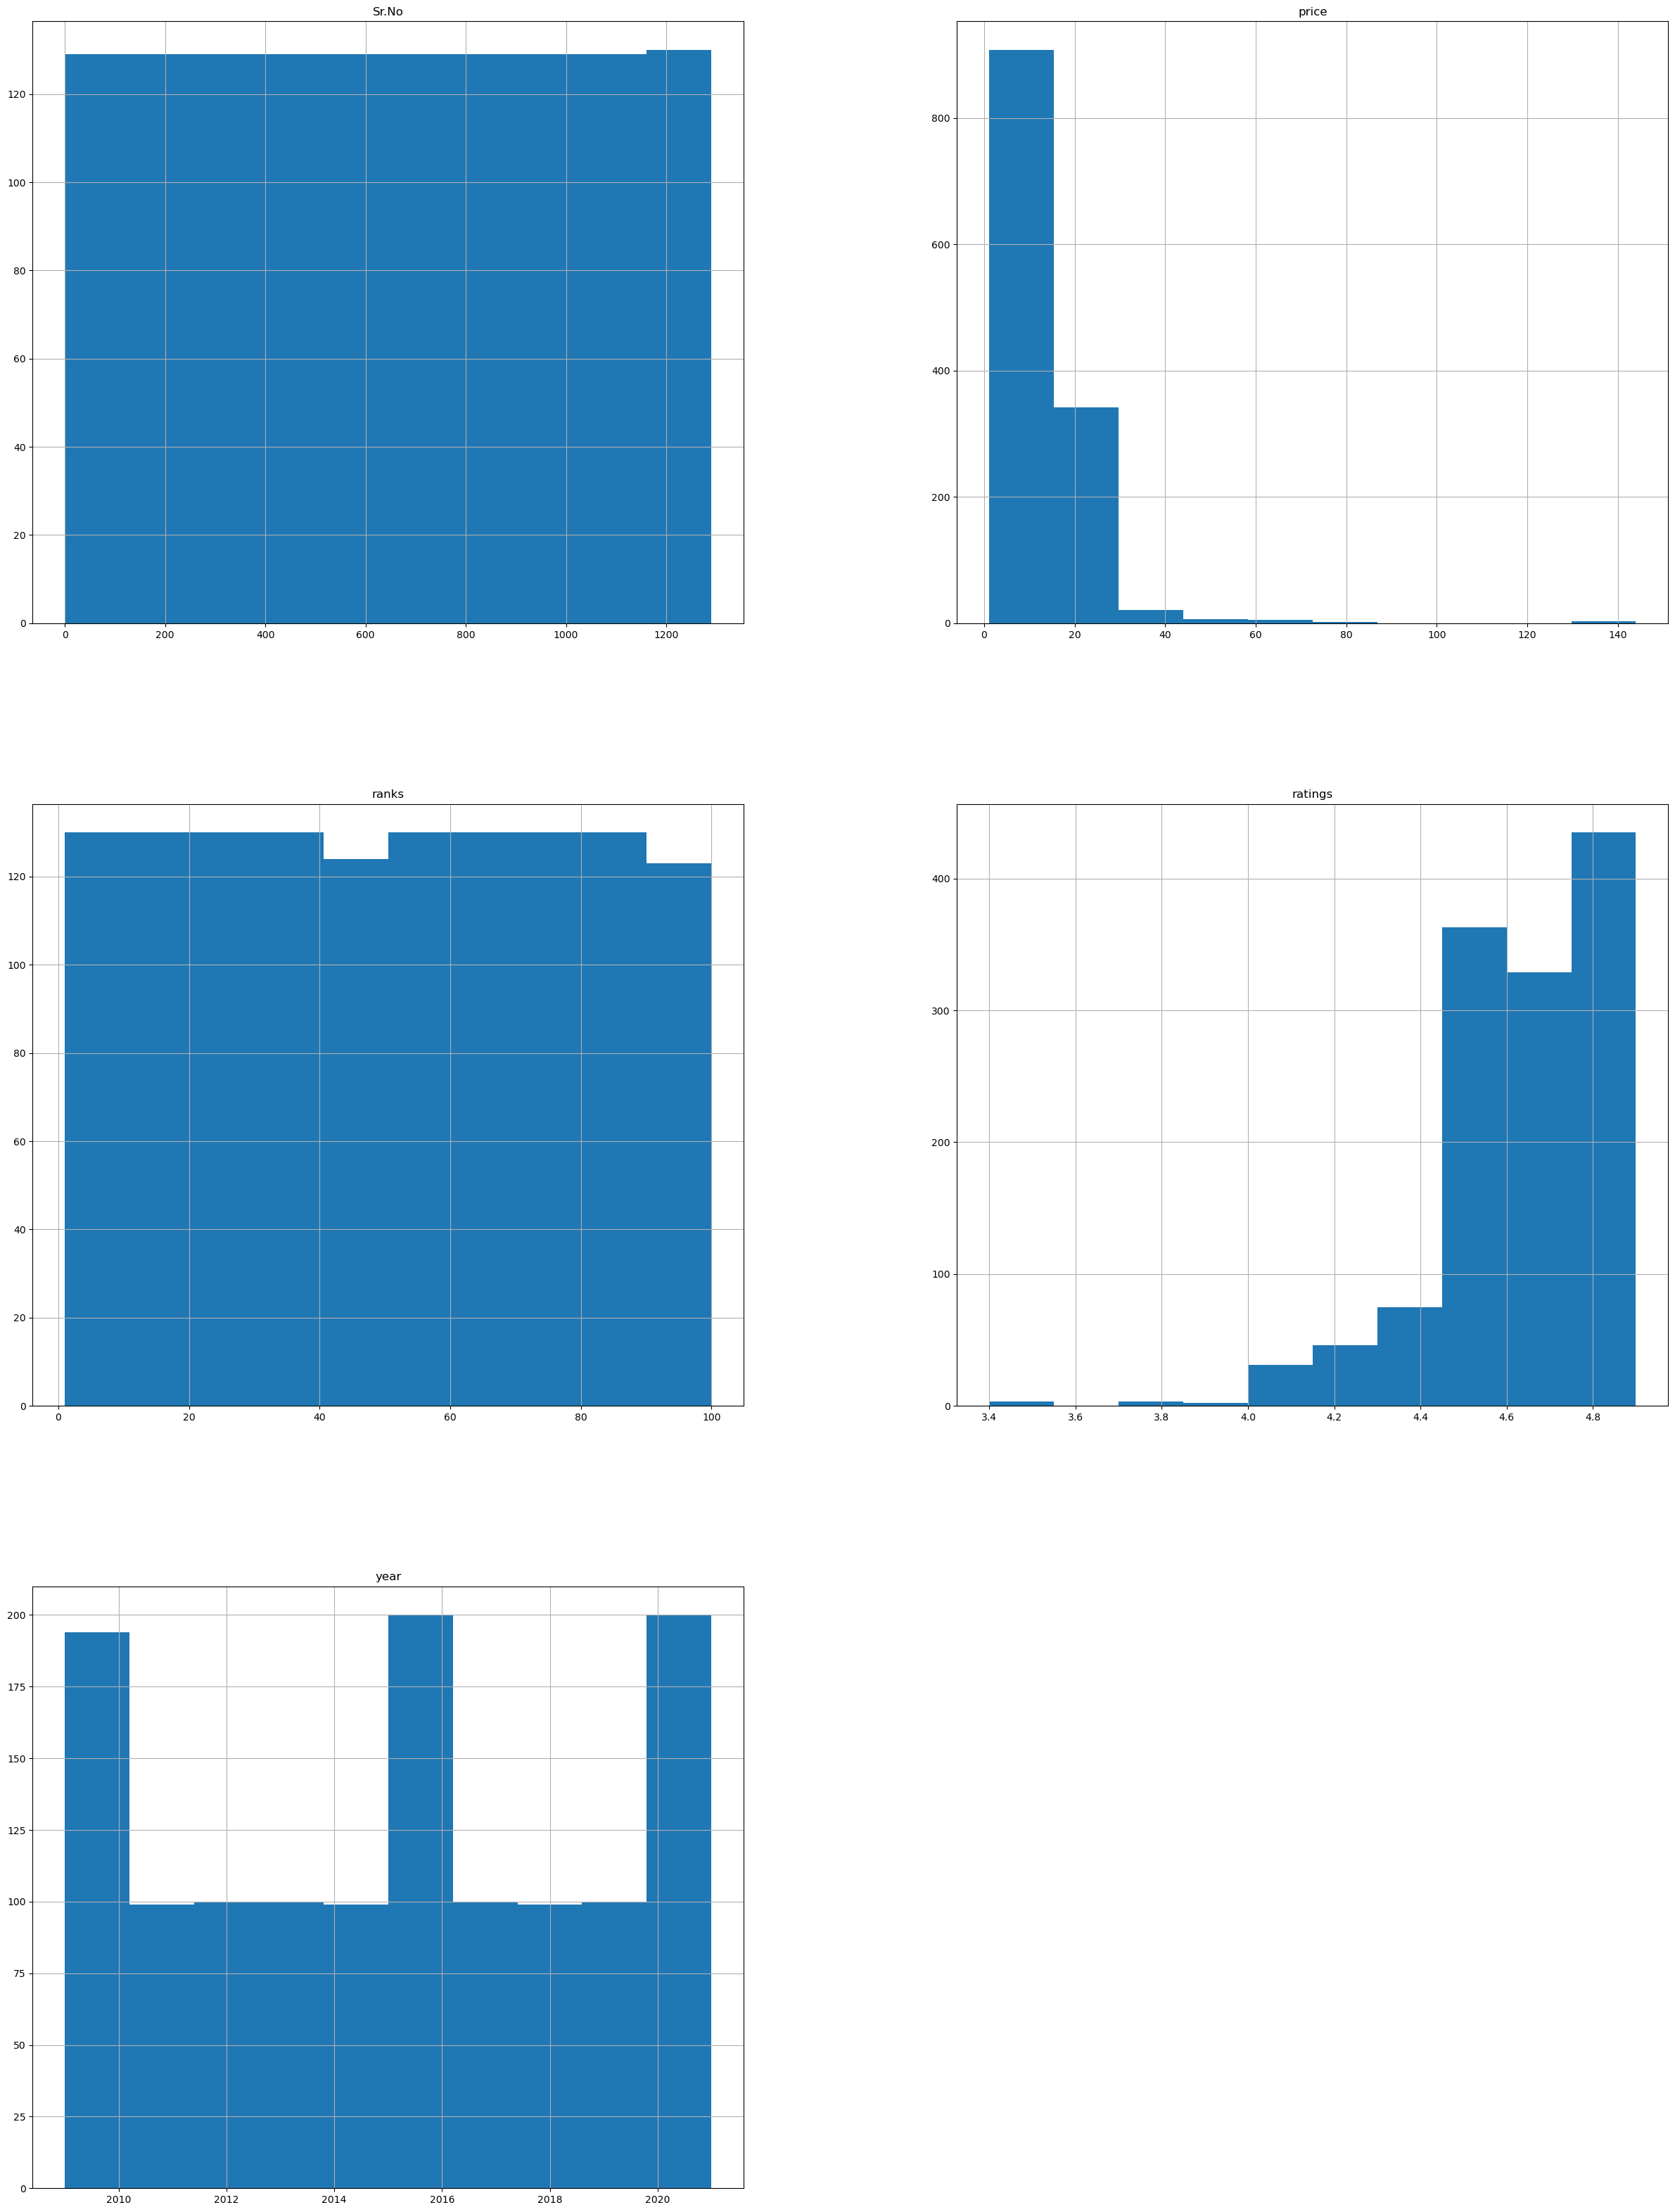

In [6]:

# Visualize distributions using histograms
plt.figure(figsize=(30, 40))
df.hist(figsize=(30, 40))
plt.show()


### Histogram of a specific column (e.g., 'price')

C:\Users\Surface\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


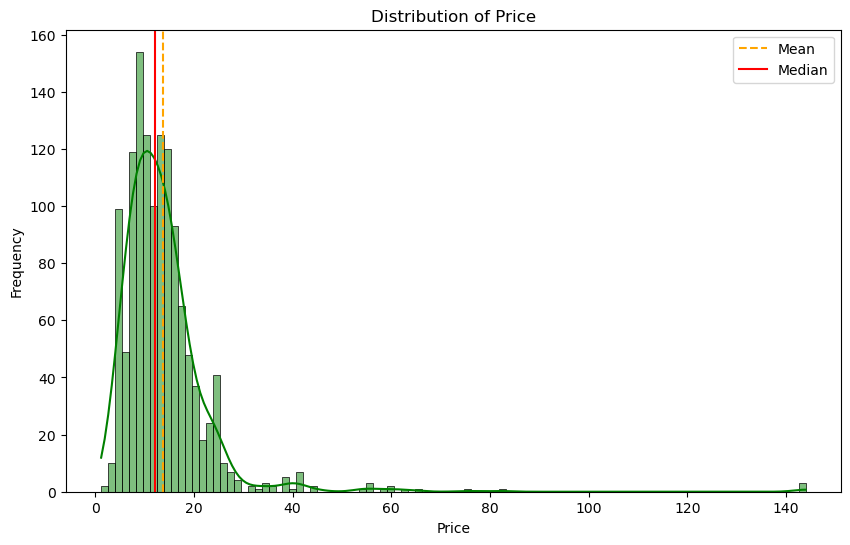

In [6]:

# Histogram of a specific column (e.g., 'price')
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.axvline(x=df['price'].mean(), color='orange', linestyle='--', label='Mean')
plt.axvline(x=df['price'].median(), color='red', linestyle='-', label='Median')
plt.legend()
plt.show()


### Create box plots for price by genre

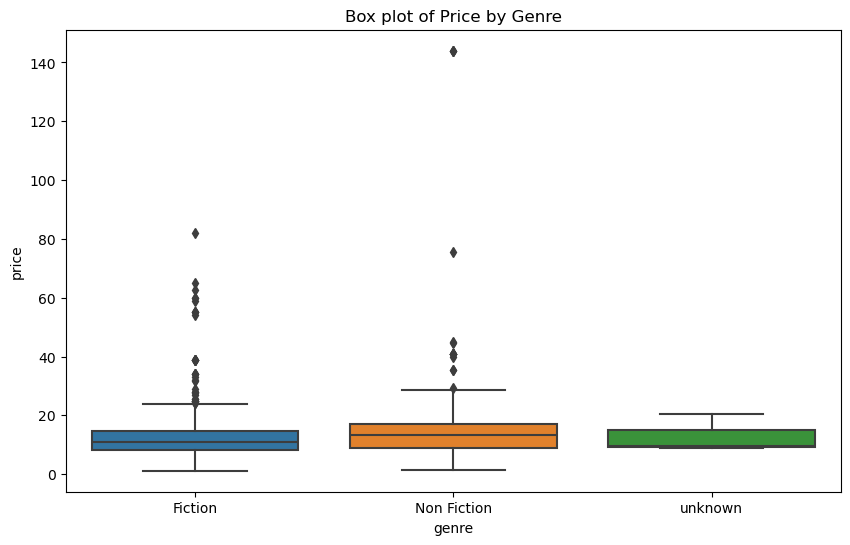

In [7]:

# Create box plots for price by genre
plt.figure(figsize=(10, 6))
sns.boxplot(x="genre", y="price", data=df)
plt.title('Box plot of Price by Genre')
plt.show()


### Create cross-tabulations

In [8]:

# Create cross-tabulations
cross_tab_genre_cover = pd.crosstab(df['genre'], df['cover_type'])
print("Cross-tabulation of Genre and Cover Type:")
display(cross_tab_genre_cover)


Cross-tabulation of Genre and Cover Type:


cover_type,Board book,Cards,Hardcover,Mass Market Paperback,Pamphlet,Paperback,Printed Access Code,Spiral-bound
genre,,,,,,,,
Fiction,59,1,287,25,0,188,0,0
Non Fiction,21,3,354,4,1,338,1,1
unknown,0,0,1,0,0,1,0,0


### Count plot of genre by cover_type

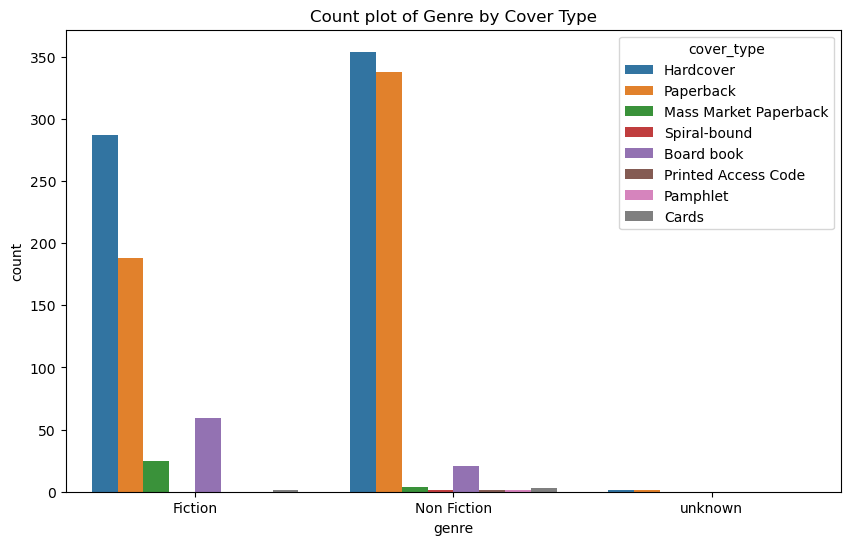

In [9]:

# Count plot of genre by cover_type
plt.figure(figsize=(10, 6))
sns.countplot(x="genre", hue="cover_type", data=df)
plt.title('Count plot of Genre by Cover Type')
plt.show()


### Generate pivot tables

In [10]:

# Generate pivot tables
pivot_price = pd.pivot_table(df, 'price', index=['genre', 'cover_type'], columns=['year'])
print("Pivot table: Price by Genre and Cover Type:")
display(pivot_price)


Pivot table: Price by Genre and Cover Type:


year                                    2009       2010       2011       2012  \
genre       cover_type                                                          
Fiction     Board book                   NaN        NaN        NaN        NaN   
            Cards                        NaN        NaN        NaN        NaN   
            Hardcover              17.809333  14.301538  16.330000  16.062500   
            Mass Market Paperback  45.070000  23.230000  54.980000  54.980000   
            Paperback              14.621765  11.196667  13.266667  13.746000   
Non Fiction Board book                   NaN        NaN        NaN        NaN   
            Cards                        NaN        NaN        NaN        NaN   
            Hardcover              16.049615  16.382188  15.633103  16.948108   
            Mass Market Paperback        NaN        NaN        NaN  21.900000   
            Pamphlet                     NaN        NaN        NaN        NaN   
            Paperback              14.975909  19.030455  18.206154  16.992857   
            Printed Access Code          NaN        NaN        NaN        NaN   
            Spiral-bound                 NaN  35.300000        NaN        NaN   
unknown     Hardcover                    NaN        NaN  20.610000        NaN   
            Paperback                    NaN        NaN        NaN        NaN   

year                                    2013       2014       2015       2016  \
genre       cover_type                                                          
Fiction     Board book              4.930000   5.820000   6.874444   5.355000   
            Cards                        NaN        NaN        NaN        NaN   
            Hardcover              14.658095  19.539583  12.160667  13.789091   
            Mass Market Paperback  25.707500  13.221429  14.117500  12.420000   
            Paperback              11.338000   8.852632   8.134167  13.200714   
Non Fiction Board book                   NaN   4.780000   5.912500   5.895000   
            Cards                        NaN        NaN        NaN        NaN   
            Hardcover              16.305294  15.852632  15.323810  15.537222   
            Mass Market Paperback        NaN        NaN        NaN        NaN   
            Pamphlet                     NaN        NaN        NaN   1.500000   
            Paperback              19.093333  20.836364  15.065429   9.437500   
            Printed Access Code    75.490000        NaN        NaN        NaN   
            Spiral-bound                 NaN        NaN        NaN        NaN   
unknown     Hardcover                    NaN        NaN        NaN        NaN   
            Paperback                    NaN        NaN        NaN   8.990000   

year                                    2017       2018       2019       2020  \
genre       cover_type                                                          
Fiction     Board book              4.978750   5.531429   5.122857   5.122857   
            Cards                        NaN        NaN        NaN   2.990000   
            Hardcover              11.843000  14.431905  11.757222  11.620500   
            Mass Market Paperback   7.480000        NaN        NaN   7.480000   
            Paperback              12.908571  11.655833   9.444286  10.031111   
Non Fiction Board book              5.160000   5.250000   5.720000   4.873333   
            Cards                        NaN        NaN   2.990000   2.670000   
            Hardcover              14.951852  15.044483  13.945357  14.167778   
            Mass Market Paperback        NaN   8.990000   8.990000   8.990000   
            Pamphlet                     NaN        NaN        NaN        NaN   
            Paperback              10.136154  10.300370   9.961724   8.795667   
            Printed Access Code          NaN        NaN        NaN        NaN   
            Spiral-bound                 NaN        NaN        NaN        NaN   
unknown     Hardcover        

### Pair plot of the dataset

C:\Users\Surface\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Surface\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Surface\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Surface\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

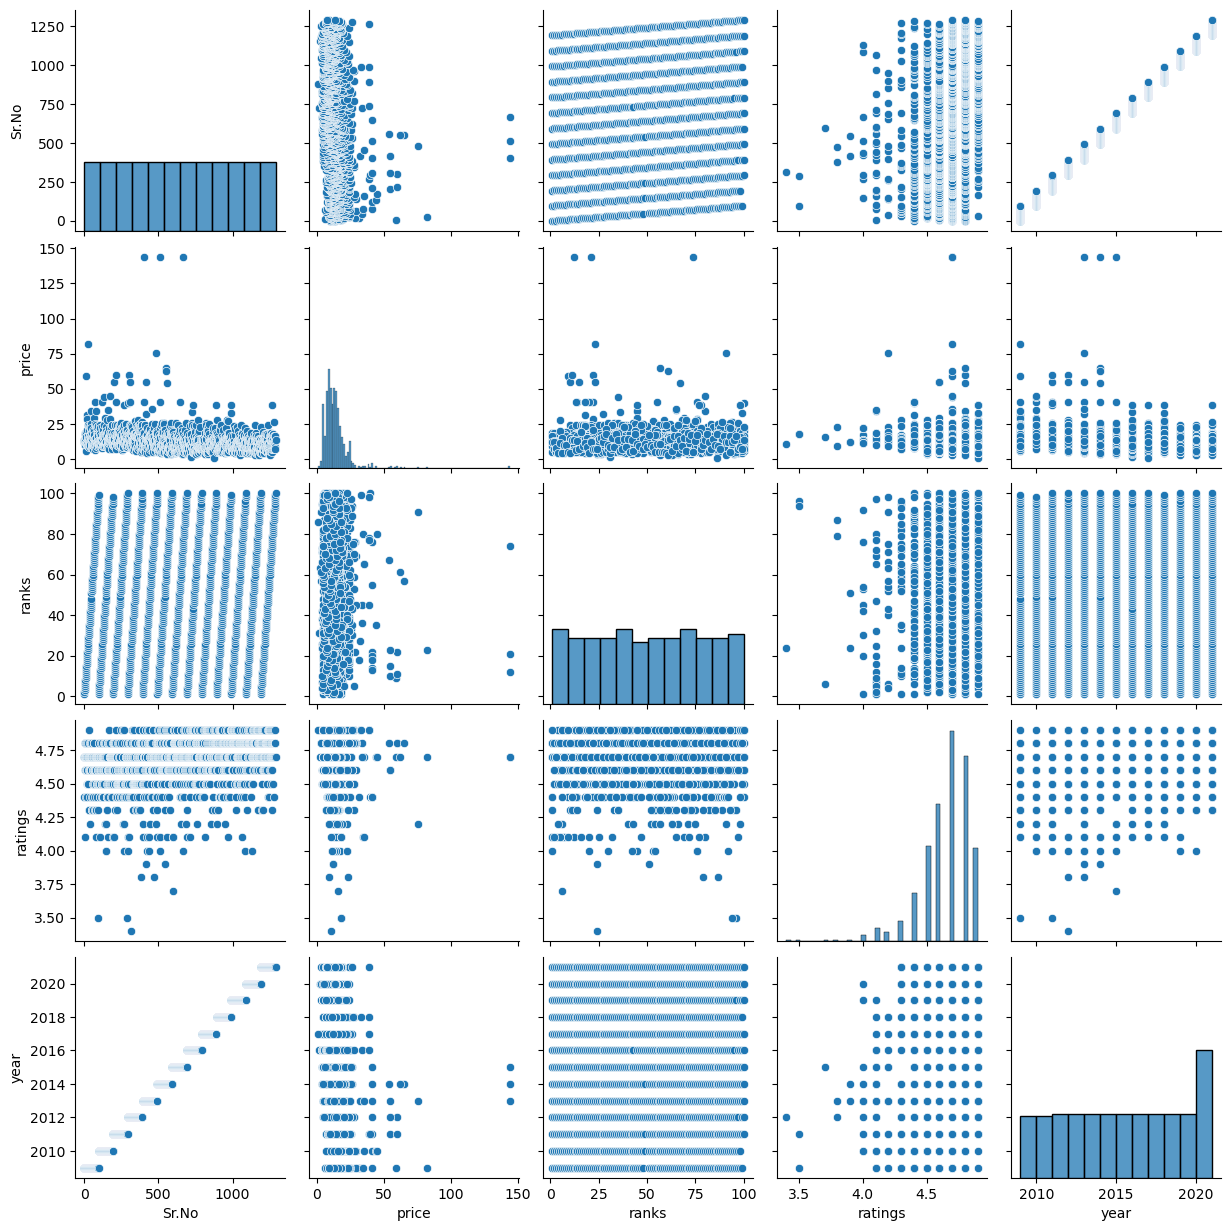

In [11]:

# Pair plot of the dataset
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()


### Calculate standard deviation and mean

In [12]:

# Calculate standard deviation and mean
std_price = df['price'].std()
mean_price = df['price'].mean()
print(f"Standard Deviation of Price: {std_price}")
print(f"Mean of Price: {mean_price}")


Standard Deviation of Price: 10.046390568591027
Mean of Price: 13.757117327117326


### Distribution plot of price using seaborn

C:\Users\Surface\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


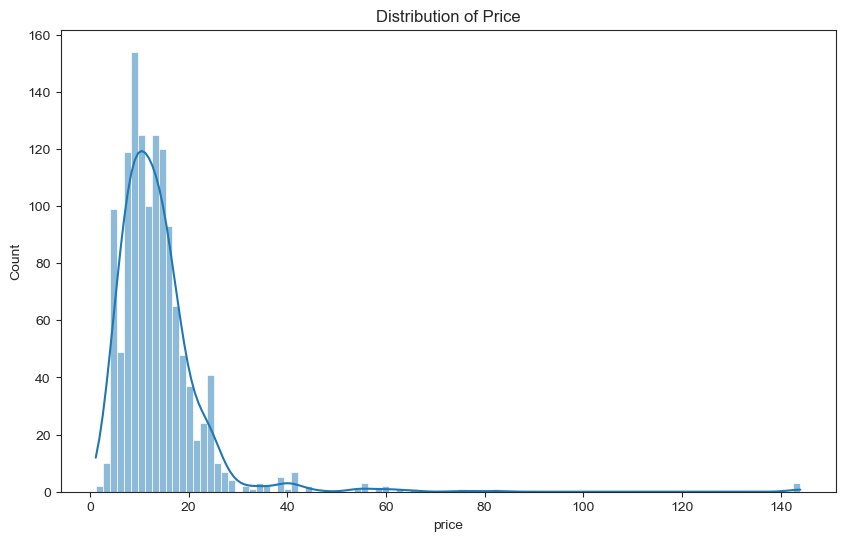

In [29]:

# Distribution plot of price using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()



## Step 2: Statistical Analysis

### Basic statistics: Mean, Median, and Standard Deviation

In [14]:

# Calculate mean, median, and standard deviation for numerical columns
numerical_columns = ['price', 'ranks', 'ratings', 'year']
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
std_values = df[numerical_columns].std()

# Display mean, median, and standard deviation values
print("Mean values of numerical columns:")
display(mean_values)

print("Median values of numerical columns:")
display(median_values)

print("Standard Deviation of numerical columns:")
display(std_values)


Mean values of numerical columns:


price        13.757117
ranks        50.246309
ratings       4.650894
year       2015.027111
dtype: float64

Median values of numerical columns:


price        12.1
ranks        50.0
ratings       4.7
year       2015.0
dtype: float64

Standard Deviation of numerical columns:


price      10.046391
ranks      28.803308
ratings     0.197174
year        3.734404
dtype: float64

### Plot mean values

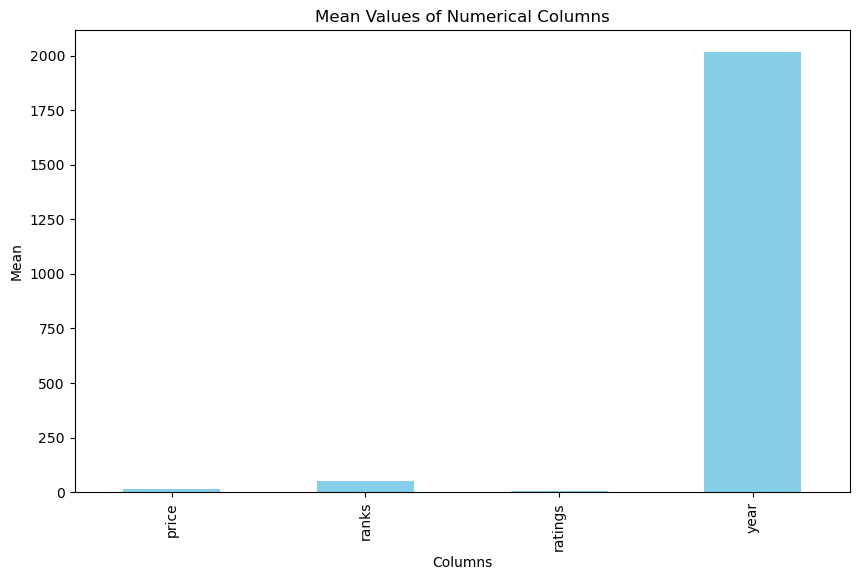

In [15]:

# Plot mean values
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', color='skyblue')
plt.title('Mean Values of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.show()


### Plot median values

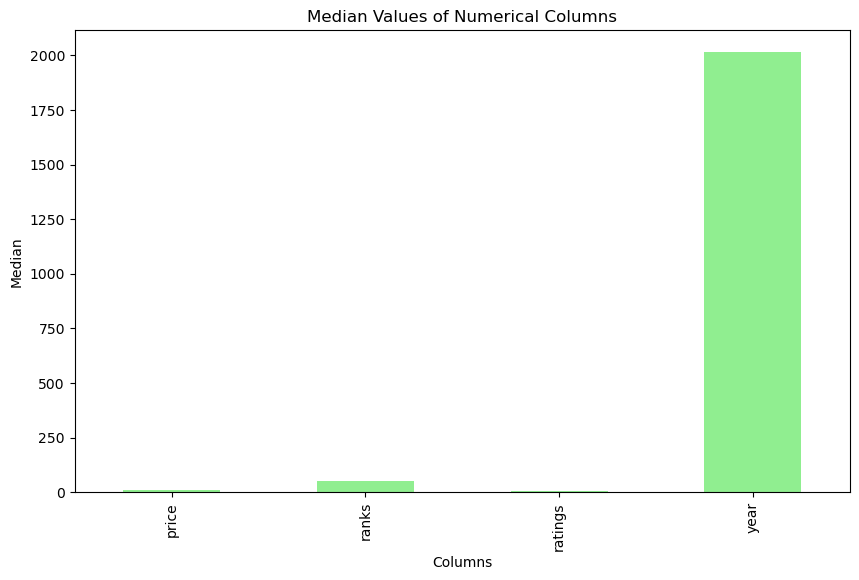

In [16]:

# Plot median values
plt.figure(figsize=(10, 6))
median_values.plot(kind='bar', color='lightgreen')
plt.title('Median Values of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Median')
plt.show()


### Plot standard deviation values

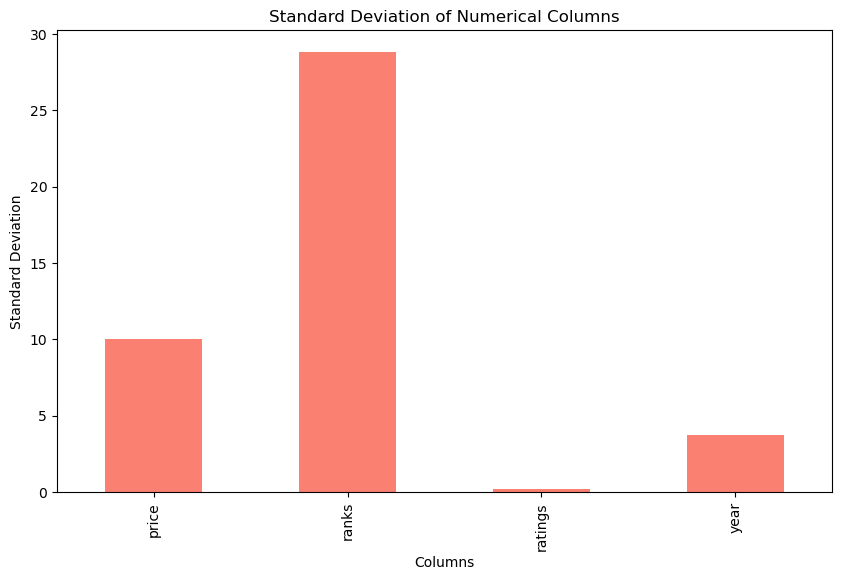

In [17]:

# Plot standard deviation values
plt.figure(figsize=(10, 6))
std_values.plot(kind='bar', color='salmon')
plt.title('Standard Deviation of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Standard Deviation')
plt.show()


### Generate random data and visualize skewness

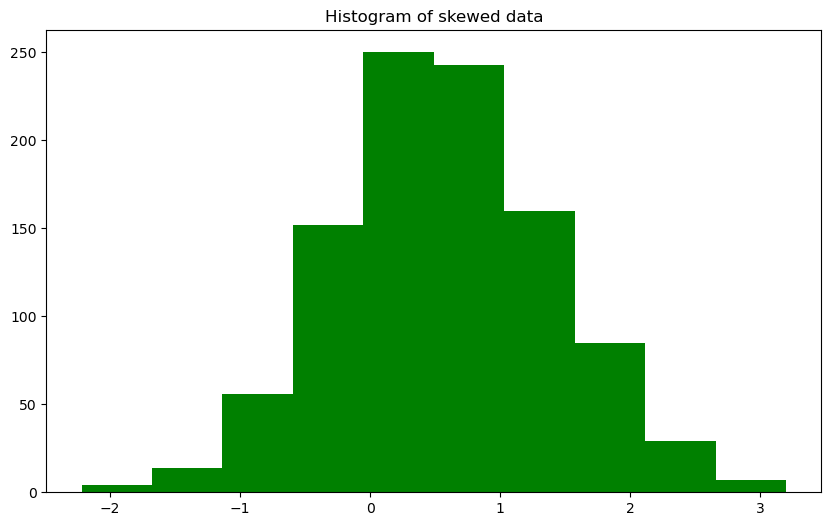

In [18]:

# Generate random data and visualize skewness
x = st.skewnorm.rvs(1, size=1000)
plt.figure(figsize=(10, 6))
plt.hist(x, color='green')
plt.title('Histogram of skewed data')
plt.show()


### Calculate and visualize mean and median

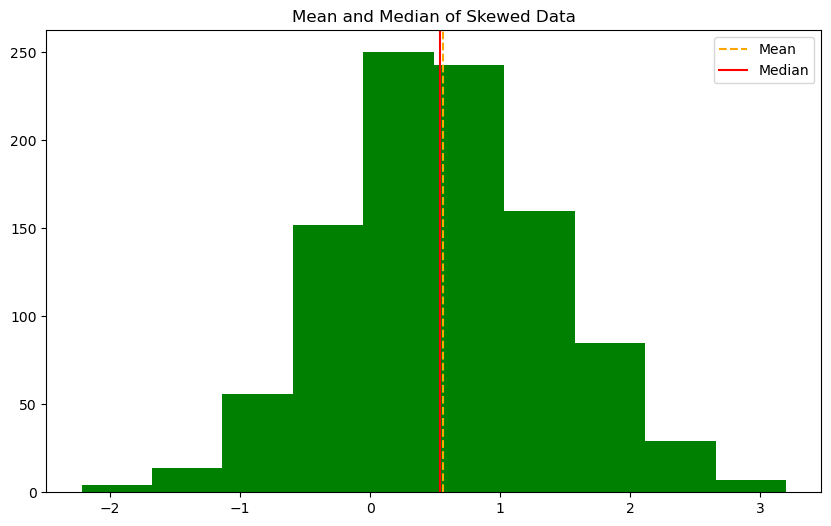

In [19]:

# Calculate and visualize mean and median
xbar = x.mean()
median = np.median(x)
plt.figure(figsize=(10, 6))
plt.axvline(x=x.mean(), color='orange', linestyle='--', label='Mean')
plt.axvline(x=np.median(x), color='red', linestyle='-', label='Median')
plt.hist(x, color='green')
plt.title('Mean and Median of Skewed Data')
plt.legend()
plt.show()


### Calculate variance and standard deviation

In [20]:

# Calculate variance and standard deviation
variance = x.var()
std_dev = x.std()
print(f"Variance of Skewed Data: {variance}")
print(f"Standard Deviation of Skewed Data: {std_dev}")


Variance of Skewed Data: 0.705761176624825
Standard Deviation of Skewed Data: 0.8400959329890991


### Visualize standard deviation

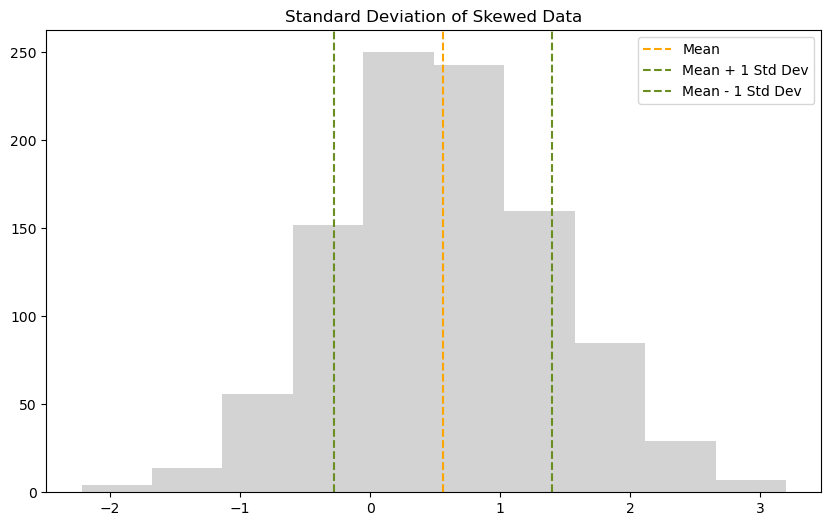

In [21]:

# Visualize standard deviation
plt.figure(figsize=(10, 6))
plt.axvline(x=xbar, color='orange', linestyle='--', label='Mean')
plt.axvline(x=xbar + std_dev, color='olivedrab', linestyle='--', label='Mean + 1 Std Dev')
plt.axvline(x=xbar - std_dev, color='olivedrab', linestyle='--', label='Mean - 1 Std Dev')
plt.hist(x, color='lightgray')
plt.title('Standard Deviation of Skewed Data')
plt.legend()
plt.show()


### Visualize confidence intervals using seaborn

C:\Users\Surface\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

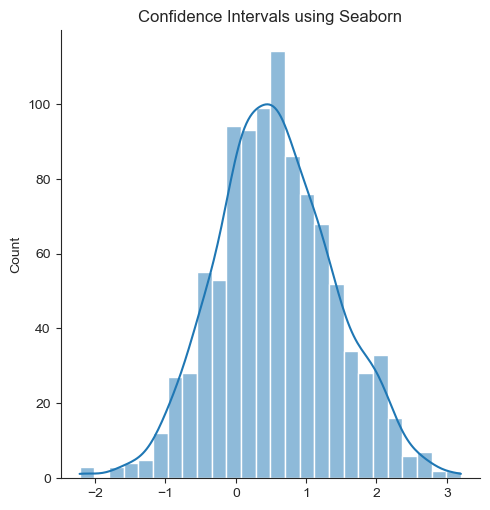

In [25]:

# Visualize confidence intervals using seaborn
sns.set_style('ticks')
plt.figure(figsize=(10, 6))
sns.displot(x, kde=True)
plt.title('Confidence Intervals using Seaborn')
plt.show()
